<a href="https://colab.research.google.com/github/NbtKmy/gc_workshops/blob/main/Netzwerk_OpenCitation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph-Darstellung der bibliographischen Daten

OpenCitations bietet unterschiedliche API-Zugriffe auf bibliographischen Daten. Die Nutzung der API ist [hier](https://opencitations.net/index/api/v1#description) genau beschrieben.

Hier holen wir Datenset durch einen API-Schnittstelle zuerst. Danach wollen wir das Datenset als Graph darstellen.

Als Ausgangpunkt nehmen wir einen Artikel "Multimodal Neurons In Artificial Neural Networks" (DOI: 10.23915/distill.00030).

In [ ]:
import requests

url = "https://opencitations.net/index/api/v1/metadata/10.23915/distill.00030"
req = requests.get(url)
start_article = req.json()

print(start_article)

[{'oa_link': '', 'volume': '6', 'page': '', 'doi': '10.23915/distill.00030', 'issue': '3', 'reference': '', 'title': 'Multimodal Neurons In Artificial Neural Networks', 'citation_count': '35', 'source_title': 'Distill', 'year': '2021', 'author': 'Goh, Gabriel; Cammarata, Nick; Voss, Chelsea; Carter, Shan; Petrov, Michael; Schubert, Ludwig; Radford, Alec; Olah, Chris', 'citation': '10.3390/neurosci2020010; 10.1145/3461702.3462474; 10.1155/2021/5321153; 10.1017/s0266267121000237; 10.1155/2021/3355030; 10.1007/978-3-030-86362-3_2; 10.1155/2021/3480414; 10.1167/jov.21.11.8; 10.1155/2021/7171816; 10.3390/jmse9121405; 10.1155/2021/1370180; 10.1016/b978-0-323-91197-9.00005-9; 10.3390/app12031050; 10.1007/978-3-030-92659-5_17; 10.1016/j.jhepr.2022.100443; 10.1016/j.pnucene.2022.104149; 10.1145/3514094.3534136; 10.1145/3531146.3533183; 10.1145/3531146.3533185; 10.1088/1741-2552/ac6770; 10.1002/ajb2.1842; 10.1145/3528223.3530068; 10.3390/arts11050083; 10.1162/neco_a_01534; 10.1016/j.knosys.2022.

In [ ]:
import json

print("{}".format(json.dumps(start_article,indent=4)))

[
    {
        "oa_link": "",
        "volume": "6",
        "page": "",
        "doi": "10.23915/distill.00030",
        "issue": "3",
        "reference": "",
        "title": "Multimodal Neurons In Artificial Neural Networks",
        "citation_count": "35",
        "source_title": "Distill",
        "year": "2021",
        "author": "Goh, Gabriel; Cammarata, Nick; Voss, Chelsea; Carter, Shan; Petrov, Michael; Schubert, Ludwig; Radford, Alec; Olah, Chris",
        "citation": "10.3390/neurosci2020010; 10.1145/3461702.3462474; 10.1155/2021/5321153; 10.1017/s0266267121000237; 10.1155/2021/3355030; 10.1007/978-3-030-86362-3_2; 10.1155/2021/3480414; 10.1167/jov.21.11.8; 10.1155/2021/7171816; 10.3390/jmse9121405; 10.1155/2021/1370180; 10.1016/b978-0-323-91197-9.00005-9; 10.3390/app12031050; 10.1007/978-3-030-92659-5_17; 10.1016/j.jhepr.2022.100443; 10.1016/j.pnucene.2022.104149; 10.1145/3514094.3534136; 10.1145/3531146.3533183; 10.1145/3531146.3533185; 10.1088/1741-2552/ac6770; 10.1002/

In [ ]:
# Der erste Artikel wurde nur zitiert!
citations = start_article[0]["citation"].split("; ")
# print(citations)

In [ ]:
cits_str = "__".join(citations)
sec_url = "https://opencitations.net/index/api/v1/metadata/" + cits_str

sec_req = requests.get(sec_url)
sec_articles = sec_req.json()
print("{}".format(json.dumps(sec_articles, indent=4)))

## Die unteren 2 Codes nicht ausführen!

In [ ]:
# Achtung: Dieser Prozess dauert ca. 30 min! Deshalb beim Workshop nicht ausführen!
import time

third_articles = []
for article in sec_articles:
    refs = article["reference"]
    if len(refs) != 0:
        refs = refs.split("; ")
        refs_str = "__".join(refs)
        refs_url = "https://opencitations.net/index/api/v1/metadata/" + refs_str
        refs_req = requests.get(refs_url)
        refs_results = refs_req.json()
        third_articles.extend(refs_results)
        time.sleep(2)

    cites = article["citation"]
    if len(cites) != 0:
        cites = cites.split("; ")
        cites_str = "__".join(cites)
        cites_url = "https://opencitations.net/index/api/v1/metadata/" + cites_str
        cites_req = requests.get(cites_url)
        cites_results = cites_req.json()
        third_articles.extend(cites_results)
        time.sleep(2)

In [ ]:
# Wenn man den oberen Schritt erspart hat, kann man diesen Schritt auch auslassen
import json

full_articles = start_article + sec_articles + third_articles


with open("output.json", "w") as outfile:
    json.dump(full_articles, outfile)

## Ab hier wieder weiter verfahren



## JSON Daten für Graph

NetworkX kann auch JSON-Daten nehmen, um Graph herzustellen.
Dabei braucht man JSON-Daten in der bestimmen Schreibweise (nach [d3.js](https://d3js.org/)).

Letzt endlich soll die Daten so aussehen:
```json

{
  "nodes": [
    {"id": "Myriel", "group": 1},
    {"id": "Napoleon", "group": 1},
    {"id": "Mlle.Baptistine", "group": 1},
    {"id": "Mme.Magloire", "group": 1},
    {"id": "CountessdeLo", "group": 1},
    {"id": "Geborand", "group": 1},
    {"id": "Champtercier", "group": 1},
    {"id": "Cravatte", "group": 1}
  ],
  "links": [
    {"source": "Napoleon", "target": "Myriel", "value": 1},
    {"source": "Mlle.Baptistine", "target": "Myriel", "value": 8},
    {"source": "Mme.Magloire", "target": "Myriel", "value": 10},
    {"source": "Mme.Magloire", "target": "Mlle.Baptistine", "value": 6},
    {"source": "CountessdeLo", "target": "Myriel", "value": 1},
    {"source": "Geborand", "target": "Myriel", "value": 1},
    {"source": "Champtercier", "target": "Myriel", "value": 1}
  ]
  }
  ```

Unten versuchen wir einen Beispiel-Graph erstellen.

Dabei wird die Funktion "node_link_graph" verwendet. Die nähere Beschreibung dazu ist [hier](https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.json_graph.node_link_graph.html#networkx.readwrite.json_graph.node_link_graph).  

In [ ]:
import networkx as nx

# Beispiel Daten
data = {
    "nodes": [
        { "id": "Multimodal Neurons In Artificial Neural Networks", "name": "0"},
        { "id": "Neural Information Processing And Computations Of Two-Input Synapses", "name": "1"},
        { "id": "Decoding Family\u00e2\u0080\u0090Level Features For Modern And Fossil Leaves From Computer\u00e2\u0080\u0090Vision Heat Maps", "name": "2"}
    ],
    "links": [
        { "source": "0", "target": "1"},
        { "source": "0", "target": "2"}
    ]
}

# Die Beschreibung zur Methode "node_link_graph" ist
graph = nx.node_link_graph(data, directed=True, name="name")
nx.draw(graph, node_size=400, node_color="red", with_labels=True, font_weight="bold")



Das sollte funktionieren! Wir sollen die Json-Daten "output.json" irgendwie umformlieren, um die Graph daraus zu erstellen.

## Daten umformlieren

Zuerst die Daten [/Netzwerk/data/output.json](https://github.com/NbtKmy/gc_workshops/tree/main/Netzwerk/data) in den Arbeitsbereich hochladen.

In [1]:
import json

with open("output.json", encoding="utf-8") as f:
    file = json.load(f)


def findTitleFromJson (doi, data):
    ind = 0
    for i in data:
        iDoi = i.get("doi")
        if doi == iDoi:
            title = data[ind]["title"]
            break
        ind += 1
    return title


node_ids = [] # Dies ist nur für überprüfung
nodes = []
links = []

for i in file:

    node = { "id":i["doi"], "name":i["title"] }
    node_ids.append(i["doi"])
    nodes.append(node)

for j in file:
    refs = j["reference"]
    citing = j["citation"]

    if len(refs) != 0:
         refs = refs.split("; ")
         for x in refs:
            if x in node_ids:
                t = findTitleFromJson(x, file)
                link = { "source": t, "target": j["title"]}
                links.append(link)

    if len(citing) != 0:
        citing = citing.split("; ")
        for y in citing:
            if y in node_ids:
                t = findTitleFromJson(y, file)
                link = { "source": j["title"], "target": t}
                links.append(link)

# Doubletten beseitigen
def getUniqueList(seq):
    seen = []
    return [x for x in seq if x not in seen and not seen.append(x)]
links = getUniqueList(links)

g_data = { "nodes": nodes, "links": links}




In [3]:
import networkx as nx

# Man kann jetzt aus den Daten eine Graph-Datei erstellen. Daraus kann man die Graph in "GML"-Format umwandeln.
# Die GML-Datei kann man in einem Graph-Software wie "Gephi (Desktop-App)" öffnen und dort weiter bearbeiten.
graph = nx.node_link_graph(g_data, directed=True, name="name")
nx.write_gml(graph, "citations.gml")

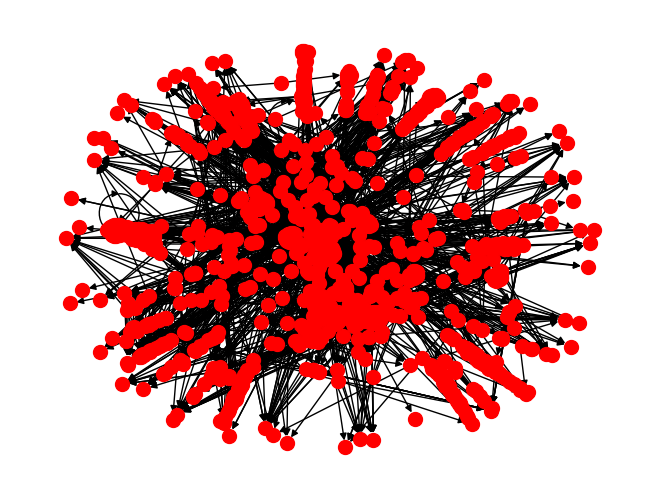

In [ ]:
# Die Darstellung allein mit NetworkX wird nicht wirklich schön...
nx.draw(graph, node_size=100, node_color="red", with_labels=False)

## Weitere Bearbeitung

Wie oben erwähnt, kann man die Graph in GEXF-Format in der browser-basierten Applikation "Gephi Lite" anzeigen und die Darstellung weiter ändern.
Probieren wir zuerst dies: https://gephi.org/gephi-lite/

__Quiz:__ Kann man die angezeigten Node nach ein Parameter filtern?